This dataset has much more time data available. I've only taken a year's worth of solar power generation compared to the load

Net generation in MW from solar, wind and hydro

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from datetime import datetime

In [3]:
balance_files = glob.glob("data/EIA930_BALANCE_*.csv")

In [10]:
# if balance_files:
#     # Load the first file to understand column structure
#     sample_file = balance_files[0]
#     print(f"\nAnalyzing columns in {sample_file}...")
    
#     # Read just the header to examine column names
#     df_header = pd.read_csv(sample_file, nrows=0)
#     print("\nColumns in balance file:")
#     for col in df_header.columns:
#         print(f"- {col}")
    
#     # Read a few rows to get a sample of the data
#     print("\nReading sample data (first 5 rows)...")
#     df_sample = pd.read_csv(sample_file, nrows=5)
#     print(df_sample.head())
    
#     # Look for renewable energy related columns
#     energy_cols = [col for col in df_header.columns if any(s in col.lower() for s in 
#                     ['solar', 'sun', 'wind', 'hydro', 'water', 'renewable', 'generation'])]
    
#     print("\nPotential energy source columns:")
#     for col in energy_cols:
#         print(f"- {col}")
        
#     if energy_cols:
#         print("\nLoading full data to analyze generation patterns...")
        
#         # Now read the entire file
#         df = pd.read_csv(sample_file)
#         print(f"Dataset shape: {df.shape}")
        
#         # Check for missing values in key columns
#         print("\nMissing values in potential energy columns:")
#         if energy_cols:
#             for col in energy_cols:
#                 if col in df.columns:
#                     print(f"- {col}: {df[col].isna().sum()} missing values")
        
#         # Look at value distributions for potential energy source columns
#         print("\nValue distribution for potential energy columns:")
#         for col in energy_cols:
#             if col in df.columns:
#                 non_null = df[col].dropna()
#                 if len(non_null) > 0:
#                     print(f"\n{col}:")
#                     print(f"  Min: {non_null.min()}")
#                     print(f"  Max: {non_null.max()}")
#                     print(f"  Mean: {non_null.mean()}")
#                     print(f"  Non-zero values: {(non_null != 0).sum()} out of {len(non_null)}")

#         # Check date range in the data
#         if 'data_date' in df.columns:
#             print("\nDate range in the data:")
#             df['data_date'] = pd.to_datetime(df['data_date'])
#             print(f"  Start date: {df['data_date'].min()}")
#             print(f"  End date: {df['data_date'].max()}")
        
#         # Check respondent (balancing authority) distribution
#         if 'respondent' in df.columns:
#             print("\nTop balancing authorities in the data:")
#             respondent_counts = df['respondent'].value_counts().head(10)
#             for resp, count in respondent_counts.items():
#                 print(f"  {resp}: {count} entries")
# else:
#     print("No balance files found. Please check the file names or directory.")

No balance files found. Please check the file names or directory.


In [4]:
renewable_columns = {
    'Solar': [
        'Net Generation (MW) from Solar without Integrated Battery Storage (Adjusted)',
        'Net Generation (MW) from Solar witho Integrated Battery Storage (Adjusted)'  # Note the typo in the column name
    ],
    'Wind': [
        'Net Generation (MW) from Wind without Integrated Battery Storage (Adjusted)',
        'Net Generation (MW) from Wind with Integrated Battery Storage (Adjusted)'
    ],
    'Hydro': [
        'Net Generation (MW) from Hydropower Excluding Pumped Storage (Adjusted)',
        'Net Generation (MW) from Pumped Storage  (Adjusted)'  # Note the double space in the column name
    ]
}


In [5]:
# Load all balance files 
balance_files = glob.glob("data/EIA930_BALANCE_*.csv")

# Create an empty list to store processed data
all_data = []

In [6]:
# Process each file
for file in balance_files:
    print(f"Processing {file}...")
    
    # Read the file
    df = pd.read_csv(file)
    
    # Convert date columns to datetime
    df['Data Date'] = pd.to_datetime(df['Data Date'])
    
    # Extract only the columns we need for analysis
    needed_columns = ['Balancing Authority', 'Data Date', 'Hour Number', 'Region', 'Net Generation (MW)']
    
    # Add all renewable energy columns
    for source in renewable_columns:
        for column in renewable_columns[source]:
            if column in df.columns:
                needed_columns.append(column)
    
    # Keep only the needed columns to reduce memory usage
    df_subset = df[needed_columns].copy()
    
    all_data.append(df_subset)
    print(f"  Processed {len(df_subset)} rows")
combined_df = pd.concat(all_data, ignore_index=True)
print(f"Combined dataset has {len(combined_df)} rows")
# Create date-time column for better time analysis
combined_df['DateTime'] = combined_df['Data Date'] + pd.to_timedelta(combined_df['Hour Number'] - 1, unit='h')

# Add month and year columns for aggregation
combined_df['Month'] = combined_df['DateTime'].dt.month
combined_df['Year'] = combined_df['DateTime'].dt.year
combined_df['YearMonth'] = combined_df['DateTime'].dt.strftime('%Y-%m')

Processing data/EIA930_BALANCE_2024_Jul_Dec.csv...
  Processed 269426 rows
Processing data/EIA930_BALANCE_2025_Jan_Jun.csv...
  Processed 112486 rows
Processing data/EIA930_BALANCE_2024_Jan_Jun.csv...
  Processed 266398 rows
Combined dataset has 648310 rows


In [7]:
combined_df

,Balancing Authority,Data Date,Hour Number,Region,Net Generation (MW),Net Generation (MW) from Solar without Integrated Battery Storage (Adjusted),Net Generation (MW) from Solar witho Integrated Battery Storage (Adjusted),Net Generation (MW) from Wind without Integrated Battery Storage (Adjusted),Net Generation (MW) from Wind with Integrated Battery Storage (Adjusted),Net Generation (MW) from Hydropower Excluding Pumped Storage (Adjusted),Net Generation (MW) from Pumped Storage (Adjusted),DateTime,Month,Year,YearMonth
0,AECI,2024-07-01,1,MIDW,2046.0,NaN,NaN,388.0,NaN,NaN,NaN,2024-07-01 00:00:00,7,2024,2024-07
1,AECI,2024-07-01,2,MIDW,1939.0,NaN,NaN,420.0,NaN,NaN,NaN,2024-07-01 01:00:00,7,2024,2024-07
2,AECI,2024-07-01,3,MIDW,1907.0,NaN,NaN,424.0,NaN,NaN,NaN,2024-07-01 02:00:00,7,2024,2024-07
3,AECI,2024-07-01,4,MIDW,1834.0,NaN,NaN,456.0,NaN,NaN,NaN,2024-07-01 03:00:00,7,2024,2024-07
4,AECI,2024-07-01,5,MIDW,1857.0,NaN,NaN,483.0,NaN,NaN,NaN,2024-07-01 04:00:00,7,2024,2024-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648305,YAD,2024-06-30,20,CAR,151.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-30 19:00:00,6,2024,2024-06
648306,YAD,2024-06-30,21,CAR,12.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-30 20:00:00,6,2024,2024-06
648307,YAD,2024-06-30,22,CAR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-30 21:00:00,6,2024,2024-06
648308,YAD,2024-06-30,23,CAR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-30 22:00:00,6,2024,2024-06


In [20]:
# Function to safely sum columns (handling missing values)
def sum_columns(row, columns):
    values = [row[col] for col in columns if col in row.index and not pd.isna(row[col])]
    return sum(values) if values else np.nan

# Add total generation for each renewable source
for source, columns in renewable_columns.items():
    valid_columns = [col for col in columns if col in combined_df.columns]
    if valid_columns:
        combined_df[f'Total {source} Generation'] = combined_df.apply(
            lambda row: sum_columns(row, valid_columns), axis=1)

In [21]:
monthly_data = combined_df.groupby('YearMonth').agg({
    'Total Solar Generation': 'mean',
    'Total Wind Generation': 'mean',
    'Total Hydro Generation': 'mean',
    'Net Generation (MW)': 'mean'
}).reset_index()

Analyzing monthly trends...


In [22]:
# Calculate percentage of total generation
for source in ['Solar', 'Wind', 'Hydro']:
    monthly_data[f'{source} Percentage'] = (monthly_data[f'Total {source} Generation'] / 
                                          monthly_data['Net Generation (MW)']) * 100

In [23]:
# Sort by date
monthly_data['YearMonth'] = pd.to_datetime(monthly_data['YearMonth'])
monthly_data = monthly_data.sort_values('YearMonth')

# Analyze renewable generation by region
region_data = combined_df.groupby('Region').agg({
    'Total Solar Generation': 'mean',
    'Total Wind Generation': 'mean',
    'Total Hydro Generation': 'mean',
    'Net Generation (MW)': 'mean'
}).reset_index()

Analyzing regional distribution...


In [25]:
# Calculate percentage of total generation by region
for source in ['Solar', 'Wind', 'Hydro']:
    region_data[f'{source} Percentage'] = (region_data[f'Total {source} Generation'] / 
                                          region_data['Net Generation (MW)']) * 100
# Calculate total renewable percentage
region_data['Total Renewable Percentage'] = (
    region_data['Solar Percentage'] + 
    region_data['Wind Percentage'] + 
    region_data['Hydro Percentage']
)

# Sort by total renewable percentage
region_data = region_data.sort_values('Total Renewable Percentage', ascending=False)

# Analyze top balancing authorities
print("Analyzing top balancing authorities...")
ba_data = combined_df.groupby('Balancing Authority').agg({
    'Total Solar Generation': 'mean',
    'Total Wind Generation': 'mean',
    'Total Hydro Generation': 'mean',
    'Net Generation (MW)': 'mean'
}).reset_index()


Analyzing top balancing authorities...


In [27]:
# Calculate percentage of total generation by BA
for source in ['Solar', 'Wind', 'Hydro']:
    ba_data[f'{source} Percentage'] = (ba_data[f'Total {source} Generation'] / 
                                     ba_data['Net Generation (MW)']) * 100

# Calculate total renewable percentage
ba_data['Total Renewable Percentage'] = (
    ba_data['Solar Percentage'] + 
    ba_data['Wind Percentage'] + 
    ba_data['Hydro Percentage']
)

In [28]:
# Sort by total renewable percentage
ba_data = ba_data.sort_values('Total Renewable Percentage', ascending=False)

# Save processed data
print("Saving processed data...")
monthly_data.to_csv('renewable_monthly_trends.csv', index=False)
region_data.to_csv('renewable_by_region.csv', index=False)
ba_data.to_csv('renewable_by_ba.csv', index=False)

Saving processed data...


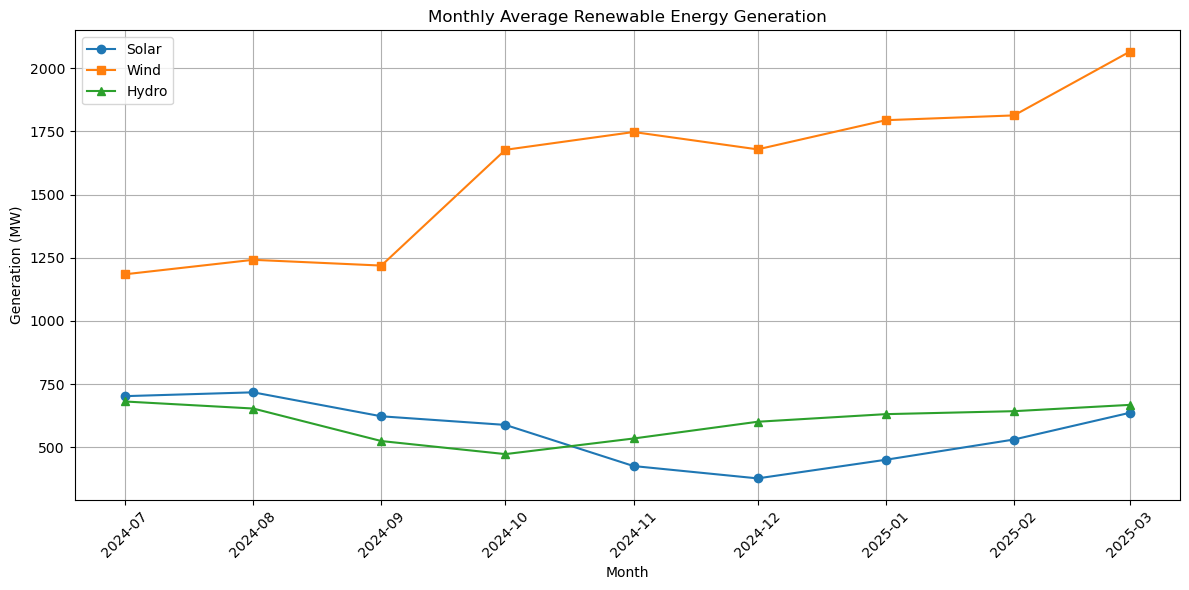

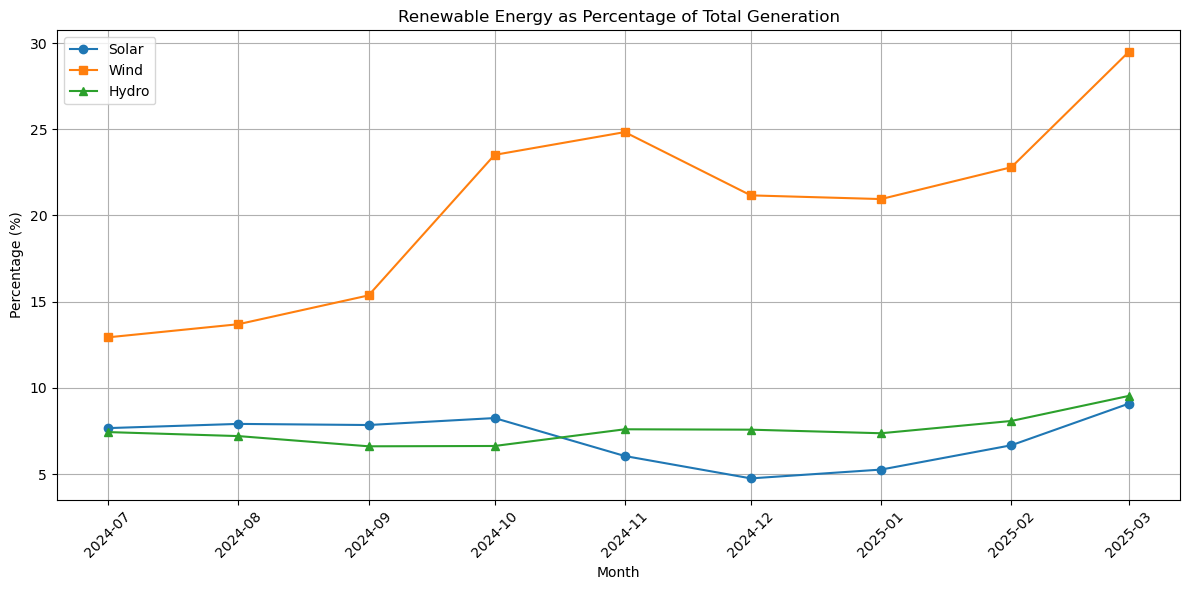

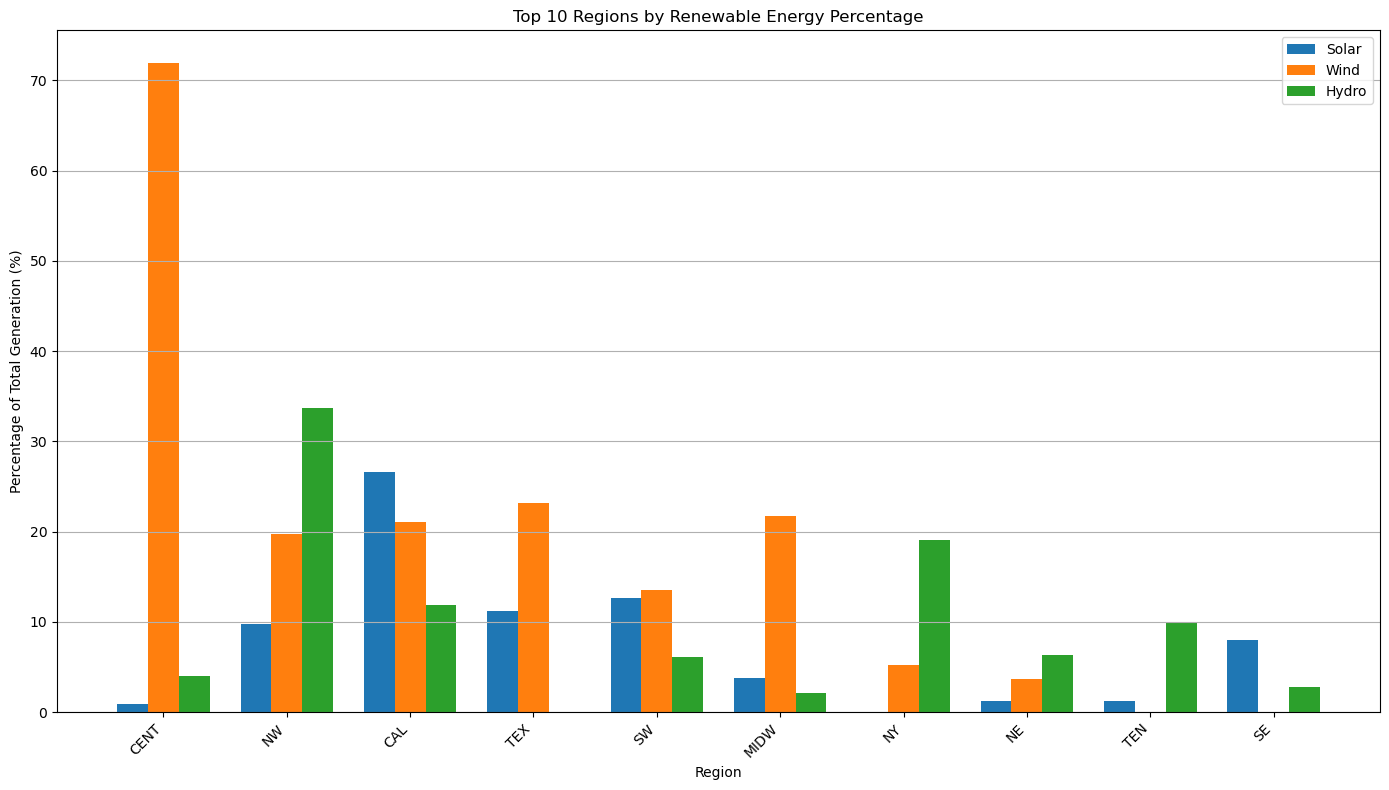

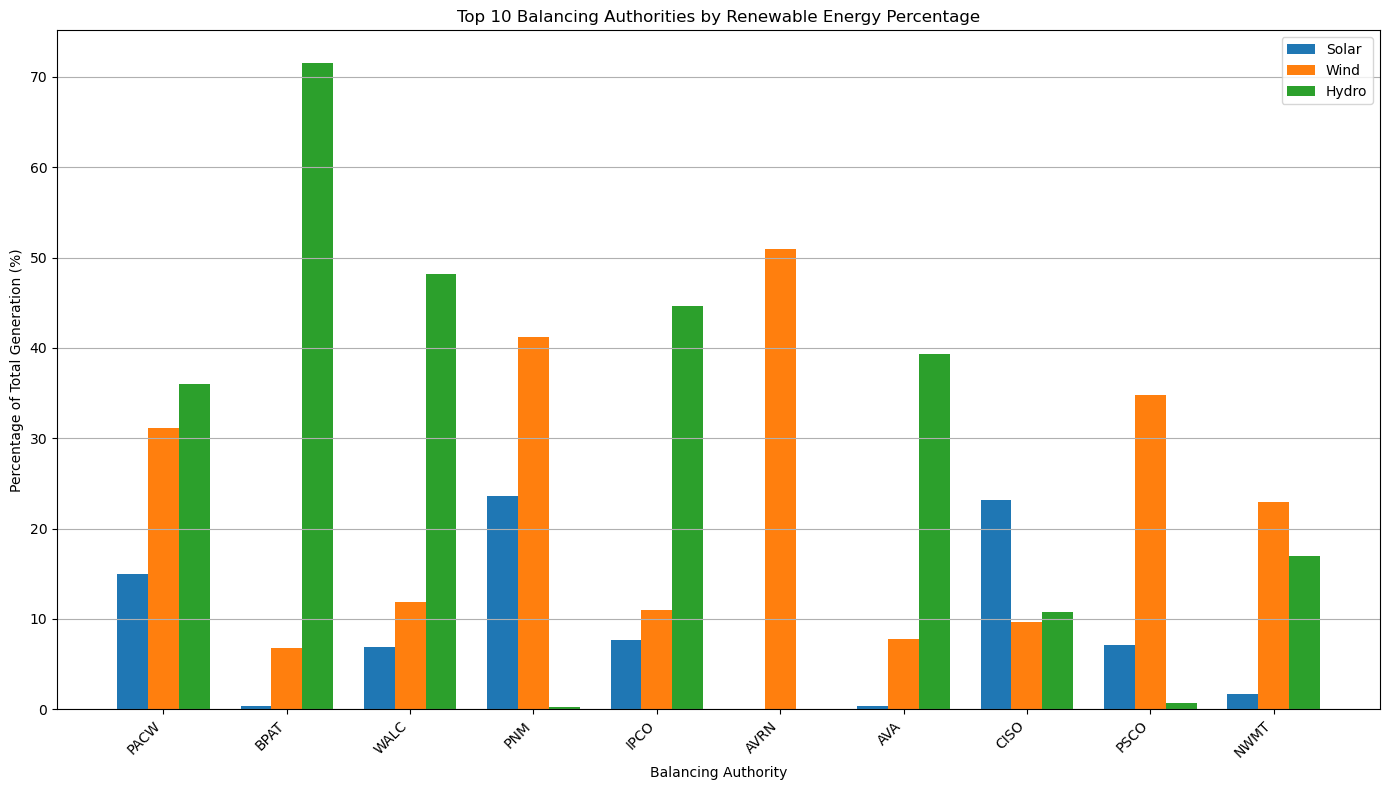

In [31]:
# Plot 1: Monthly trends of renewable generation
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['YearMonth'], monthly_data['Total Solar Generation'], label='Solar', marker='o')
plt.plot(monthly_data['YearMonth'], monthly_data['Total Wind Generation'], label='Wind', marker='s')
plt.plot(monthly_data['YearMonth'], monthly_data['Total Hydro Generation'], label='Hydro', marker='^')
plt.title('Monthly Average Renewable Energy Generation')
plt.xlabel('Month')
plt.ylabel('Generation (MW)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_renewable_generation.png')

# Plot 2: Renewable percentage of total generation
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['YearMonth'], monthly_data['Solar Percentage'], label='Solar', marker='o')
plt.plot(monthly_data['YearMonth'], monthly_data['Wind Percentage'], label='Wind', marker='s')
plt.plot(monthly_data['YearMonth'], monthly_data['Hydro Percentage'], label='Hydro', marker='^')
plt.title('Renewable Energy as Percentage of Total Generation')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_renewable_percentage.png')

# Plot 3: Top 10 regions by renewable percentage
top_regions = region_data.head(10)
plt.figure(figsize=(14, 8))
x = np.arange(len(top_regions))
width = 0.25
plt.bar(x - width, top_regions['Solar Percentage'], width, label='Solar')
plt.bar(x, top_regions['Wind Percentage'], width, label='Wind')
plt.bar(x + width, top_regions['Hydro Percentage'], width, label='Hydro')
plt.title('Top 10 Regions by Renewable Energy Percentage')
plt.xlabel('Region')
plt.ylabel('Percentage of Total Generation (%)')
plt.xticks(x, top_regions['Region'], rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('top_regions_renewable.png')

# Plot 4: Top 10 balancing authorities by renewable percentage
top_bas = ba_data.head(10)
plt.figure(figsize=(14, 8))
x = np.arange(len(top_bas))
width = 0.25
plt.bar(x - width, top_bas['Solar Percentage'], width, label='Solar')
plt.bar(x, top_bas['Wind Percentage'], width, label='Wind')
plt.bar(x + width, top_bas['Hydro Percentage'], width, label='Hydro')
plt.title('Top 10 Balancing Authorities by Renewable Energy Percentage')
plt.xlabel('Balancing Authority')
plt.ylabel('Percentage of Total Generation (%)')
plt.xticks(x, top_bas['Balancing Authority'], rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('top_bas_renewable.png')

In [30]:
# Display summary statistics
print("\n=== SUMMARY STATISTICS ===")
print("\nAverage generation by renewable source (MW):")
print(f"Solar: {combined_df['Total Solar Generation'].mean():.2f} MW")
print(f"Wind: {combined_df['Total Wind Generation'].mean():.2f} MW")
print(f"Hydro: {combined_df['Total Hydro Generation'].mean():.2f} MW")

print("\nTop 5 regions by renewable percentage:")
for i, row in region_data.head(5).iterrows():
    print(f"{row['Region']}: {row['Total Renewable Percentage']:.2f}% "
          f"(Solar: {row['Solar Percentage']:.2f}%, "
          f"Wind: {row['Wind Percentage']:.2f}%, "
          f"Hydro: {row['Hydro Percentage']:.2f}%)")

print("\nTop 5 balancing authorities by renewable percentage:")
for i, row in ba_data.head(5).iterrows():
    print(f"{row['Balancing Authority']}: {row['Total Renewable Percentage']:.2f}% "
          f"(Solar: {row['Solar Percentage']:.2f}%, "
          f"Wind: {row['Wind Percentage']:.2f}%, "
          f"Hydro: {row['Hydro Percentage']:.2f}%)")


=== SUMMARY STATISTICS ===

Average generation by renewable source (MW):
Solar: 557.31 MW
Wind: 1575.72 MW
Hydro: 597.23 MW

Top 5 regions by renewable percentage:
CENT: 76.88% (Solar: 0.91%, Wind: 71.95%, Hydro: 4.03%)
NW: 63.21% (Solar: 9.73%, Wind: 19.74%, Hydro: 33.74%)
CAL: 59.58% (Solar: 26.64%, Wind: 21.04%, Hydro: 11.89%)
TEX: 34.38% (Solar: 11.19%, Wind: 23.12%, Hydro: 0.07%)
SW: 32.30% (Solar: 12.69%, Wind: 13.48%, Hydro: 6.13%)

Top 5 balancing authorities by renewable percentage:
PACW: 82.20% (Solar: 15.00%, Wind: 31.16%, Hydro: 36.04%)
BPAT: 78.69% (Solar: 0.38%, Wind: 6.73%, Hydro: 71.58%)
WALC: 66.94% (Solar: 6.92%, Wind: 11.85%, Hydro: 48.17%)
PNM: 65.01% (Solar: 23.57%, Wind: 41.18%, Hydro: 0.26%)
IPCO: 63.25% (Solar: 7.64%, Wind: 11.02%, Hydro: 44.59%)
